In [420]:
import cv2
import numpy as np 
from IPython.display import Image, display
from matplotlib import pyplot as plt
from sklearn import cluster
import pandas as pd

def imshow(img):
   
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))


# 画像を読み込む。
img = cv2.imread("c:/temp/picture1.png")

# 画像で使用されている色一覧。(W * H, 3) の numpy 配列。
colors = img.reshape(-1, 3).astype(np.float32)

K = 32

# 最大反復回数: 10、移動量の閾値: 1.0
criteria = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0

ret, labels, centers = cv2.kmeans(
    colors, K, None, criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS
)

print(f"ret: {ret:.2f}, label: {labels.shape}, center: {centers.shape}")

labels = labels.squeeze(axis=1)  # (N, 1) -> (N,)
centers = centers.astype(np.uint8)  # float32 -> uint8

ret: 41572519.08, label: (322092, 1), center: (32, 3)


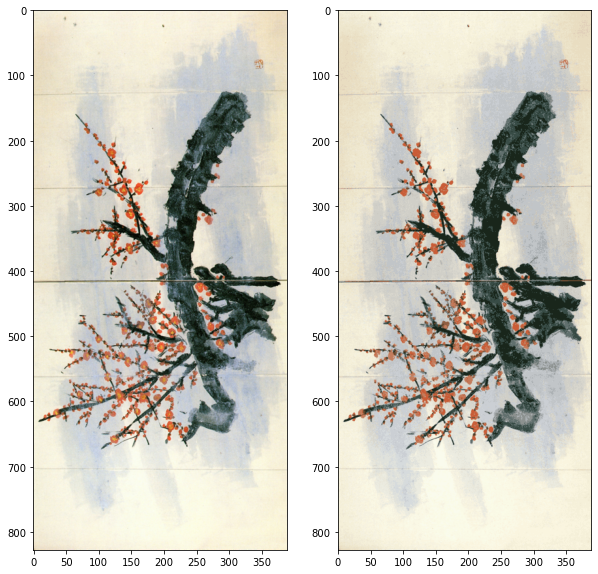

In [421]:
dst = centers[labels].reshape(img.shape)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
ax1.imshow(img)
ax2.imshow(dst)
plt.show()

In [422]:
a = 0
color_diff = []
for i in range(len(centers)):
    
    a += abs(centers[i][0] - centers[i][1])
    a += abs(centers[i][0] - centers[i][2])
    a += abs(centers[i][1] - centers[i][2])
    
    color_diff.append([a])
    a = 0

color_diff

<ipython-input-422-dd36a4333452>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  a += abs(centers[i][0] - centers[i][1])
<ipython-input-422-dd36a4333452>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  a += abs(centers[i][0] - centers[i][2])
<ipython-input-422-dd36a4333452>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  a += abs(centers[i][1] - centers[i][2])


[[742],
 [14],
 [262],
 [690],
 [646],
 [486],
 [18],
 [712],
 [688],
 [746],
 [490],
 [726],
 [562],
 [698],
 [704],
 [752],
 [284],
 [472],
 [724],
 [260],
 [14],
 [726],
 [16],
 [716],
 [472],
 [714],
 [738],
 [614],
 [282],
 [728],
 [504],
 [670]]

In [423]:
color_diff_k = cluster.KMeans(n_clusters=2).fit(color_diff)

In [424]:
centers2 = color_diff_k.cluster_centers_
#centers2
npcdk = np.where(color_diff_k.labels_ == 1)
npcdk[0]

array([ 1,  2,  6, 16, 19, 20, 22, 28], dtype=int64)

In [425]:
labels2 = color_diff_k.labels_

In [426]:
new_centers = [] 
for i in range(len(centers)):
    if i in npcdk[0]:
        new_centers.append([255,0,0])
    else:
        new_centers.append(list(centers[i]))
new_centers = np.array(new_centers, np.uint8)

In [427]:
len(labels2)

32

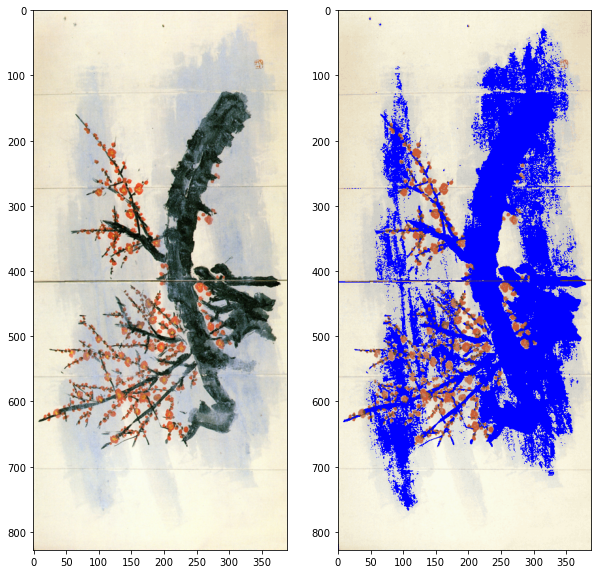

In [428]:
dst = new_centers[labels].reshape(img.shape)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 10))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
ax1.imshow(img2)
ax2.imshow(dst)
plt.show()

In [322]:
npcdk1 = np.where(color_diff_k.labels_ == 0)
npcdk1[0]#無

array([ 0,  1,  2,  3,  6,  7,  9, 12, 17, 20, 21, 23, 26], dtype=int64)

In [323]:
npcdk2 = np.where(color_diff_k.labels_ == 1)
npcdk2[0]#有

array([ 4,  5,  8, 10, 11, 13, 14, 15, 16, 18, 19, 22, 24, 25, 27, 28, 29,
       30, 31], dtype=int64)

In [324]:
non_color = []
nonnon_color = []
for i in range(len(centers)):
    if i in npcdk[0]: 
        non_color.append(list(centers[i]))
    else:
        nonnon_color.append(list(centers[i]))
non_color

[[62, 70, 53],
 [200, 194, 188],
 [213, 203, 197],
 [180, 176, 171],
 [204, 204, 202],
 [216, 210, 205],
 [225, 216, 209],
 [138, 140, 133],
 [102, 104, 88],
 [25, 35, 23],
 [227, 224, 218],
 [214, 215, 212],
 [219, 222, 218]]

In [333]:
bar_color = centers[:, ::-1] / 255
_, counts = np.unique(labels, axis=0, return_counts=True)

In [334]:
bar_color

array([[0.20784314, 0.2745098 , 0.24313725],
       [0.7372549 , 0.76078431, 0.78431373],
       [0.77254902, 0.79607843, 0.83529412],
       [0.67058824, 0.69019608, 0.70588235],
       [0.78823529, 0.37647059, 0.22745098],
       [0.77254902, 0.64705882, 0.58039216],
       [0.79215686, 0.8       , 0.8       ],
       [0.80392157, 0.82352941, 0.84705882],
       [0.96862745, 0.94509804, 0.8627451 ],
       [0.81960784, 0.84705882, 0.88235294],
       [0.83529412, 0.76470588, 0.70196078],
       [0.9254902 , 0.89019608, 0.79215686],
       [0.52156863, 0.54901961, 0.54117647],
       [0.83137255, 0.81960784, 0.77647059],
       [0.5254902 , 0.3372549 , 0.22745098],
       [0.89019608, 0.86666667, 0.80392157],
       [0.78039216, 0.78431373, 0.76470588],
       [0.34509804, 0.40784314, 0.4       ],
       [0.9372549 , 0.91372549, 0.82745098],
       [0.75294118, 0.50196078, 0.38431373],
       [0.09019608, 0.1372549 , 0.09803922],
       [0.85490196, 0.87843137, 0.89019608],
       [0.

In [343]:
df_counts = pd.DataFrame({'counts': counts})
df_R = pd.DataFrame({'R': bar_color[:,0]})
df_G= pd.DataFrame({'G': bar_color[:,1]})
df_B = pd.DataFrame({'B': bar_color[:,2]})
result = df_counts.join([df_R, df_G,df_B])
result_s = result.sort_values(by=['counts'],ascending=False)
result_s = result_s.reset_index()
result_s

,index,counts,R,G,B
0,8,39829,0.968627,0.945098,0.862745
1,29,29368,0.980392,0.972549,0.898039
2,18,24237,0.937255,0.913725,0.827451
3,16,17423,0.780392,0.784314,0.764706
4,11,16530,0.925490,0.890196,0.792157
5,6,16426,0.792157,0.800000,0.800000
6,20,15769,0.090196,0.137255,0.098039
7,28,15156,0.941176,0.925490,0.866667
8,13,14941,0.831373,0.819608,0.776471
9,0,14136,0.207843,0.274510,0.243137


In [344]:
bar_color[:,0] = result_z.R
bar_color[:,1] = result_z.G
bar_color[:,2] = result_z.B

ValueError: could not broadcast input array from shape (8) into shape (32)

In [345]:
countss = {}
for i in range(len(counts)):
    countss[i] = result_s.counts[i] / result_s.counts.sum()
result_s

,index,counts,R,G,B
0,8,39829,0.968627,0.945098,0.862745
1,29,29368,0.980392,0.972549,0.898039
2,18,24237,0.937255,0.913725,0.827451
3,16,17423,0.780392,0.784314,0.764706
4,11,16530,0.925490,0.890196,0.792157
5,6,16426,0.792157,0.800000,0.800000
6,20,15769,0.090196,0.137255,0.098039
7,28,15156,0.941176,0.925490,0.866667
8,13,14941,0.831373,0.819608,0.776471
9,0,14136,0.207843,0.274510,0.243137


AttributeError: module 'pandas' has no attribute 'result_s'

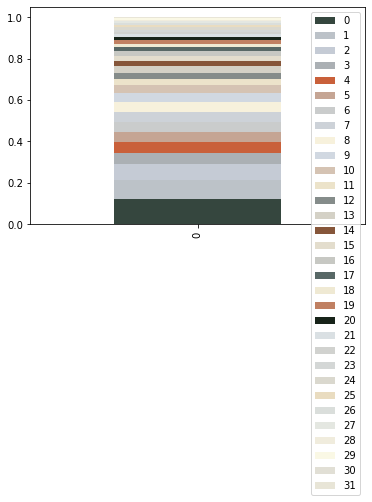

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame([countss])
    
ax = plt.subplot()
df1.plot.bar(stacked=True, color=bar_color, ax=ax)
plt.show()

In [ ]:
goleggierggg